In [66]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress

def T(E):
    return 1.5 + 23.3*E
 
def qa(Tb, T1, x1, x0):
    k=10
    A=0
    return k*A*((Tb-T1)/(x1-x0))

def errorplot(ax, data_x, data_y, color, label):
    ax.errorbar((data_x)/max(data_x), data_y, xerr=0, yerr=1, fmt='o', markeredgecolor='black', 
        markerfacecolor=color, label=label, markersize=5, capsize=5)
    ax.plot((data_x)/max(data_x), data_y, color=color)

def calc_m(k, d):
    h = 5
    d = d/39.3701 # in to m
    P = np.pi*(d)
    A = (1/4)*np.pi*d**2
    return (h*P)/(k*A)

def teta_conv(x, k, d, L):
    h = 5
    m = calc_m(k, d)
    coef = m*(L-x)
    A = np.cosh(coef) + (h/(m*k))*np.sinh(coef)
    B = np.cosh(m*L) + (h/(m*k))*np.sinh(m*L)
    return A/B

def teta_adiab(x, k, d, L):
    h = 5
    m = calc_m(k, d)
    coef = m*(L-x)
    return np.cosh(coef)/np.cosh(m*L)

def T_distr(teta, T_b, T_inf):
    return teta*T_b - teta*T_inf + T_inf

df1 = pd.read_excel("Dados_experimento_1bert.xlsx", index_col=0, sheet_name='Sheet1')
dfn = pd.read_excel("Dados_experimento_1bert.xlsx", index_col=0, sheet_name='Sheet2')

Tb = 99.4; T_inf=26

In [67]:
df1['Barra1'] = T(df1['Barra1'].values)

dfn['Barra2'] = T(dfn['Barra2'].values)
dfn['Barra3'] = T(dfn['Barra3'].values)
dfn['Barra4'] = T(dfn['Barra4'].values)

In [68]:
with pd.ExcelWriter("Tab_dados.xlsx") as writer:
    df1.to_excel(writer, sheet_name="Tab1")  
    dfn.to_excel(writer, sheet_name="Tabn")  

In [69]:
df1

,T,x,Barra1
0,T1,0.035,69.8855
1,T2,0.085,61.8936
2,T3,0.135,55.4395
3,T4,0.210,48.3330
4,T5,0.285,42.8575
5,T6,0.385,38.1742
6,T7,0.489,35.4015
7,T8,0.489,35.4015
8,T9,0.489,35.4015
9,T10,0.489,35.4015


In [70]:
dfn

,T,x,Barra2,Barra3,Barra4
0,T1,0.035,77.6211,83.0267,77.9706
1,T2,0.085,68.1846,74.5455,57.1171
2,T3,0.135,59.7733,67.7419,44.3953
3,T4,0.210,51.1057,59.0044,34.0035
4,T5,0.285,44.3487,52.2474,28.9241
5,T6,0.410,36.5432,44.2322,25.6155
6,T7,0.545,31.4172,38.0344,24.5204
7,T8,0.695,28.0620,33.7705,24.1942
8,T9,0.845,26.4077,31.2774,24.0078
9,T10,0.989,25.7320,30.1823,24.4971


### Comparando distribuição de temperaturas obtidas experimental e teórica

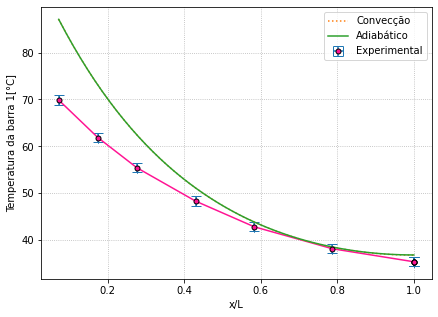

In [71]:
#%matplotlib qt

#Barra1
fig, ax = plt.subplots(figsize=(7, 5))
ax.set(xlabel='x/L', ylabel=r'Temperatura da barra 1[°C]')

x = np.linspace(min(df1.x), max(df1.x))

errorplot(ax, df1.x, df1.Barra1, 'deeppink', 'Experimental')
ax.plot(x/max(x), T_distr(teta_conv(x, 237, 5/8, max(df1.x)), Tb, T_inf), label='Convecção', ls=':')
ax.plot(x/max(x), T_distr(teta_adiab(x, 237, 5/8, max(df1.x)), Tb, T_inf), label='Adiabático')

ax.legend()
ax.grid(ls='dotted')
fig.savefig('barra1.pdf', bbox_inches='tight')

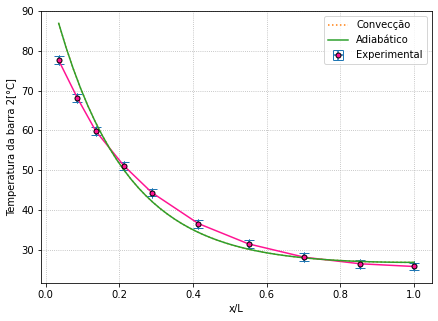

In [72]:
#Barra2
fig, ax = plt.subplots(figsize=(7, 5))
ax.set(xlabel='x/L', ylabel=r'Temperatura da barra 2[°C]')

x = np.linspace(min(dfn.x), max(dfn.x))

errorplot(ax, dfn.x, dfn.Barra2, 'deeppink', 'Experimental')
ax.plot(x/max(x), T_distr(teta_conv(x, 237, 5/8, max(dfn.x)), Tb, T_inf), label='Convecção', ls=':')
ax.plot(x/max(x), T_distr(teta_adiab(x, 237, 5/8, max(dfn.x)), Tb, T_inf), label='Adiabático')

ax.legend()
ax.grid(ls='dotted')
fig.savefig('barra2.pdf', bbox_inches='tight')

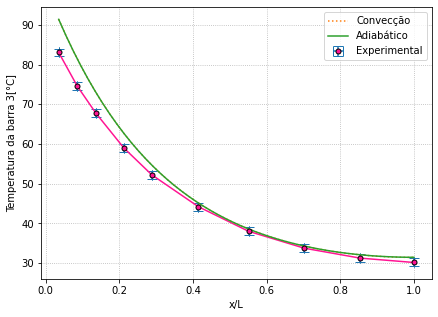

In [73]:
#Barra3
fig, ax = plt.subplots(figsize=(7, 5))
ax.set(xlabel='x/L', ylabel=r'Temperatura da barra 3[°C]')

x = np.linspace(min(dfn.x), max(dfn.x))

errorplot(ax, dfn.x, dfn.Barra3, 'deeppink', 'Experimental')
ax.plot(x/max(x), T_distr(teta_conv(x, 237, 1, max(dfn.x)), Tb, T_inf), label='Convecção', ls=':')
ax.plot(x/max(x), T_distr(teta_adiab(x, 237, 1, max(dfn.x)), Tb, T_inf), label='Adiabático')

ax.legend()
ax.grid(ls='dotted')
fig.savefig('barra3.pdf', bbox_inches='tight')

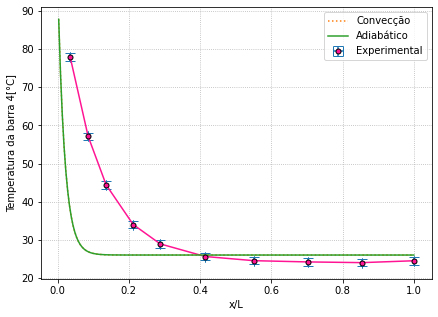

In [74]:
#%matplotlib qt

#Barra4
fig, ax = plt.subplots(figsize=(7, 5))
ax.set(xlabel='x/L', ylabel=r'Temperatura da barra 4[°C]')

x = np.linspace(0.0033, max(dfn.x), 200)

errorplot(ax, dfn.x, dfn.Barra4, 'deeppink', 'Experimental')
ax.plot(x/max(x), T_distr(teta_conv(x, 15.1, 1, max(dfn.x)), Tb, T_inf), label='Convecção', ls=':')
ax.plot(x/max(x), T_distr(teta_adiab(x, 15.1, 1, max(dfn.x)), Tb, T_inf), label='Adiabático')

ax.legend()
ax.grid(ls='dotted')
fig.savefig('barra4.pdf', bbox_inches='tight')

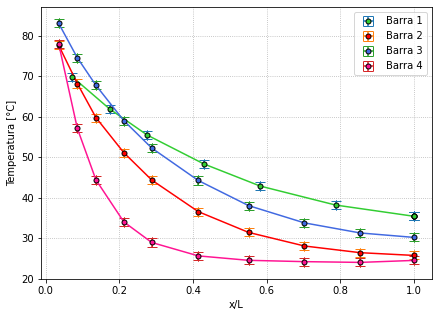

In [75]:
#%matplotlib qt

fig, ax = plt.subplots(figsize=(7, 5))
ax.set(xlabel='x/L', ylabel=r'Temperatura [°C]')

errorplot(ax, df1.x, df1.Barra1, 'limegreen', 'Barra 1')
errorplot(ax, dfn.x, dfn.Barra2, 'red', 'Barra 2')
errorplot(ax, dfn.x, dfn.Barra3, 'royalblue', 'Barra 3')
errorplot(ax, dfn.x, dfn.Barra4, 'deeppink', 'Barra 4')

ax.legend()
ax.grid(ls='dotted')

fig.savefig('Barras_geral.pdf', bbox_inches='tight')

### Cálculo dos valores RMS - 2 cond. contorno

In [76]:
def RMS(func, df_L, T_exp, T_b, T_inf):
    teta = func(df_L, 237, 5/8, max(df_L))
    c = 0
    for i in range(len(teta)):
        c = c + ((T_exp[i] - T_distr(teta[i], T_b, T_inf)))**2
    return np.sqrt(c/len(teta))

In [77]:
C1 = RMS(teta_conv, df1.x, df1.Barra1, Tb, T_inf)
C2 = RMS(teta_conv, dfn.x, dfn.Barra2, Tb, T_inf)
C3 = RMS(teta_conv, dfn.x, dfn.Barra3, Tb, T_inf)
C4 = RMS(teta_conv, dfn.x, dfn.Barra4, Tb, T_inf)

A1 = RMS(teta_adiab, df1.x, df1.Barra1, Tb, T_inf)
A2 = RMS(teta_adiab, dfn.x, dfn.Barra2, Tb, T_inf)
A3 = RMS(teta_adiab, dfn.x, dfn.Barra3, Tb, T_inf)
A4 = RMS(teta_adiab, dfn.x, dfn.Barra4, Tb, T_inf)

df = pd.DataFrame({'Aleta 1': [C1, A1], 'Aleta 2': [C2, A2], 
              'Aleta 3': [C3, A3], 'Aleta 4': [C4, A4]})

df.to_excel('Tab_RMS.xlsx')

### Eficiências das aletas

In [78]:
Tb = 99.6; T_inf=26

def efic_aleta(func, x, k, d, L, h=5):

    if type(func) == np.float64:
        T1=func
    else:
        T1 = T_distr(func(x, k, d, L), Tb, T_inf)

    d = d/39.3701 # in to m
    A_tr = ((1/4)*np.pi*(d**2))
    As = (np.pi*d*L) + ((1/4)*np.pi*(d**2))

    derivada = (Tb - T1)/(x)
    qa = k*A_tr*derivada
    
    return qa/(h*As*(Tb - T_inf)) #q EXPERIMENTAL, Q MAXIMO

#df1.head(3)

## Eficiencia térmica das aletas

In [79]:
#EXPERIMENTAL
EE1 = efic_aleta(df1.Barra1[0], df1.x[0], 237, 5/8, max(df1.x))
EE2 = efic_aleta(dfn.Barra2[0], dfn.x[0], 237, 5/8, max(dfn.x))
EE3 = efic_aleta(dfn.Barra3[0], dfn.x[0], 237, 1, max(dfn.x))
EE4 = efic_aleta(dfn.Barra4[0], dfn.x[0], 15.1, 1, max(dfn.x))

#CONVECÇÃO
EC1 = efic_aleta(teta_conv, df1.x[0], 237, 5/8, max(df1.x))
EC2 = efic_aleta(teta_conv, dfn.x[0], 237, 5/8, max(dfn.x))
EC3 = efic_aleta(teta_conv, dfn.x[0], 237, 1, max(dfn.x))
EC4 = efic_aleta(teta_conv, dfn.x[0], 15.1, 1, max(dfn.x))

#ADIABÁTICO
EA1 = efic_aleta(teta_adiab, df1.x[0], 237, 5/8, max(df1.x))
EA2 = efic_aleta(teta_adiab, dfn.x[0], 237, 5/8, max(dfn.x))
EA3 = efic_aleta(teta_adiab, dfn.x[0], 237, 1, max(dfn.x))
EA4 = efic_aleta(teta_adiab, dfn.x[0], 15.1, 1, max(dfn.x))

df = pd.DataFrame({'Aleta 1': [EE1*100, EC1*100, EA1*100], 'Aleta 2': [EE2*100, EC2*100, EA2*100], 
              'Aleta 3': [EE3*100, EC3*100, EA3*100], 'Aleta 4': [EE4*100, EC4*100, EA4*100]})

df.to_excel('Tab_efic_aletas.xlsx')
df

,Aleta 1,Aleta 2,Aleta 3,Aleta 4
0,440.184788,161.642800,194.553544,16.177195
1,182.876179,91.889101,94.567946,46.173685
2,182.858556,91.889058,94.564399,46.173685


In [80]:
##MUDANDO H=20W/MK 
##EXPERIMENTAL
#EE1 = efic_aleta(df1.Barra1[0], df1.x[0], 237, 5/8, max(df1.x), h=25)
#EE2 = efic_aleta(dfn.Barra2[0], dfn.x[0], 237, 5/8, max(dfn.x), h=25)
#EE3 = efic_aleta(dfn.Barra3[0], dfn.x[0], 237, 1, max(dfn.x), h=25)
#EE4 = efic_aleta(dfn.Barra4[0], dfn.x[0], 15.1, 1, max(dfn.x), h=25)
#
##CONVECÇÃO
#EC1 = efic_aleta(teta_conv, df1.x[0], 237, 5/8, max(df1.x), h=25)
#EC2 = efic_aleta(teta_conv, dfn.x[0], 237, 5/8, max(dfn.x), h=25)
#EC3 = efic_aleta(teta_conv, dfn.x[0], 237, 1, max(dfn.x), h=25)
#EC4 = efic_aleta(teta_conv, dfn.x[0], 15.1, 1, max(dfn.x), h=25)
#
##ADIABÁTICO
#EA1 = efic_aleta(teta_adiab, df1.x[0], 237, 5/8, max(df1.x), h=25)
#EA2 = efic_aleta(teta_adiab, dfn.x[0], 237, 5/8, max(dfn.x), h=25)
#EA3 = efic_aleta(teta_adiab, dfn.x[0], 237, 1, max(dfn.x), h=25)
#EA4 = efic_aleta(teta_adiab, dfn.x[0], 15.1, 1, max(dfn.x), h=25)
#
#df = pd.DataFrame({'Aleta 1': [EE1*100, EC1*100, EA1*100], 'Aleta 2': [EE2*100, EC2*100, EA2*100], 
#              'Aleta 3': [EE3*100, EC3*100, EA3*100], 'Aleta 4': [EE4*100, EC4*100, EA4*100]})
#
#df

### Erro das eficiências

In [81]:
df = pd.DataFrame({'Aleta 1': [abs(EC1-EE1)/EE1*100, abs(EA1-EE1)/EE1*100], 'Aleta 2': [abs(EC2-EE2)/EE2*100, abs(EA2-EE2)/EE2*100], 
              'Aleta 3': [abs(EC3-EE3)/EE3*100, abs(EA3-EE3)/EE3*100], 'Aleta 4': [abs(EC4-EE4)/EE4*100, abs(EA4-EE4)/EE4*100]})
df.to_excel('Tab_ERRos_Efic.xlsx')
df

,Aleta 1,Aleta 2,Aleta 3,Aleta 4
0,58.454680,43.152988,51.392329,185.424538
1,58.458683,43.153015,51.394152,185.424538
